### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量为文字和打印颜色匹配或不匹配，因变量为每种条件下参与者所需的时间**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

<p>H0：使用者完成实验所需的时间与文字和打印颜色是否一致无关。 即：$\mu_1 = \mu_2$</p>
<p>H1：使用者完成实验所需的时间与文字和打印颜色是否一致有关，且文字和打印颜色不同的小组所花时间多。即：$\mu_1 < \mu_2$</p>
<p>这里$\mu_1,\mu_2$分别是Congruent和Incongruent数据组的平均值</p>
<p>我会执行<strong>配对样本T检验**。</strong>
<p>原因是：</p>
<ol>
<li>两组数据为相依变量，Congruent和Incongruent数据均由同一组人员产出 </li>
<li>两组数据总体大致成正态分布 (从下方的两张Histgram可以看到，Congruent和Incongruent都呈中间高两边低的态势)</li>
</ol>

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [9]:
# TO DO: load pacakges
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
% matplotlib inline

In [10]:
# Read data files
df=pd.read_csv('stroopdata.csv')
# Have a general overview on this data set
df.info
# Assign two lists in table to two variables
data_Congruent=df['Congruent']
data_Incongruent=df['Incongruent']

In [20]:
# Statistic values for Congruent list
data_Congruent.describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [11]:
# Statistic values for Incongruent list
data_Incongruent.describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

<p>Congruent数据列的统计
    <ol>
        <li>集中趋势数值：平均值为14.05</li>
        <li>可变性测量值：标准差为3.56，四分位距为：4.31</li></ol></p>
<p>Incguent数据列的统计
    <ol>
        <li>集中趋势数值：平均值为22.02</li>
        <li>可变性测量值：标准差为4.80，四分位距为：5.33</li></ol></p>

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

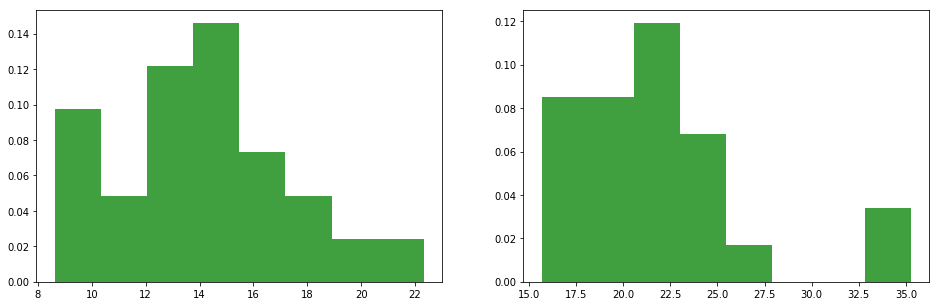

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.hist(data_Congruent, 8, normed=1, facecolor='green', alpha=0.75)
plt.subplot(1,2,2)
plt.hist(data_Incongruent, 8, normed=1, facecolor='green', alpha=0.75)
plt.show()

上方两图可以看到两组数据都围绕均值呈中高两边低的态势，大致符合正态分布。且两数据的均值相差较大。

Text(0,0.5,'Incongruent')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


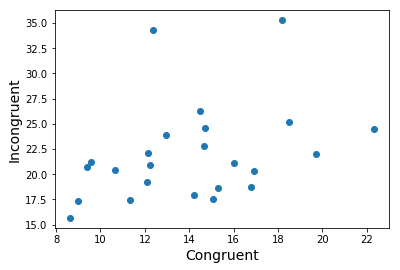

In [12]:
plt.scatter(data_Congruent,data_Incongruent)
plt.xlabel(u'Congruent',fontproperties='Calibri',fontsize=14)
plt.ylabel(u'Incongruent',fontproperties='Calibri',fontsize=14)

从上图中可以得出两个明显的结论：
1. Incongruent和Congruent之间成正比关系，Congruent较大的数组，Incongruent值也较大
2. 有两个比较明显的偏离值，一个是（12.369, 34.288），另一个是（18.2, 35.255）

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [13]:
# Calculate the T-test for means of two dependant samples
[t_Rel,ptwo_rel]=stats.ttest_rel(data_Congruent,data_Incongruent)
# Show t-statistic value
t_Rel

-8.020706944109957

In [14]:
# Show pvalue
ptwo_rel

4.1030005857111781e-08

假设显著性水平位$\alpha=0.05$，
<p>关键统计值</p>
<ol>
<li>均值差-7.95</li>
<li>自由度$df = 23$</li>
<li>$t = -8.021$</li>
<li>$t_{临界} = 1.174$</li>
<li>$p = 2.05e-8$ (ttest计算了双尾，而本次测试是采用单尾，p=ptwo_rel/2)</li>
 
</ol>

由于t绝对值高于临界值，p值远小于$\alpha$，因此我们可以拒绝H0假设，认为使用者完成实验所需的时间与文字和打印颜色是否一致有关，且文字和打印颜色不同的小组所花时间多。即：$\mu_1 < \mu_2$，这和我们从图中得到的结论一致